#### EXPERIMENT
Two Clusters of 3 dimensionalities

In [1]:
import os
import sys
import glob
import datetime
import time
 
import numpy as np
import scipy as sp
import pandas as pd
 
from scipy.spatial.distance import euclidean
from numpy.random import uniform
from numpy.random import binomial
from numpy.random import choice
 
from numpy import sin
from numpy import cos
from numpy import pi

from itertools import combinations
 
#/*------- Data Visualization ------ */
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
try:
    from learning_dist_metrics.ldm import LDM
    from learning_dist_metrics.datasets import load_sample_data
except:
    #os.chdir("C:\\A-Playground\\experiment")
    #from learning_dist_metrics.ldm import LDM
    pass

%matplotlib inline

#### Generate simulate dataset for experiment

In [2]:
## ########################## ##
## CREATE SIMULATE DATA SET   ##
## ########################## ##
np.random.seed(20150408)
n_size = 100
c01 = [0, 0]
c02 = [1, 1]
 
## ####################### ##
## Generate group 01 data ##
## ####################### ##
theta  = np.random.uniform(0, 2 * pi, n_size)
radius = np.random.uniform(0, 1, n_size)
err_x  = np.random.normal(0, 0.2, n_size)
err_y  = np.random.normal(0, 0.2, n_size)
 
x1 = []
x2 = []
for t, r, ex, ey in zip(theta, radius, err_x, err_y):
    x1.append( c01[0] + r * cos(t) + ex )
    x2.append( c01[1] + r * sin(t) + ey )

g1 = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "x3": uniform(0, 10, n_size),
    "label": [0] * n_size
    })

## ####################### ##
## Generate group 02 data  ##
## ####################### ##
theta  = np.random.uniform(0, 2 * pi, n_size)
radius = np.random.uniform(0, 1, n_size)
err_x  = np.random.normal(0, 0.2, n_size)
err_y  = np.random.normal(0, 0.2, n_size)
 
x1 = []
x2 = []
for t, r, ex, ey in zip(theta, radius, err_x, err_y):
    x1.append( c02[0] + r * cos(t) + ex )
    x2.append( c02[1] + r * sin(t) + ey )

g2 = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "x3": uniform(0, 10, n_size),
    "label": [1] * n_size
    })
## Concatenate two dataframes
db = g1.append(g2, ignore_index=True)
db.set_index(np.arange(db.shape[0]))
## Shuffle observations
db = db.loc[ np.random.choice(db.index, db.shape[0], replace=False) ]
## clean the environment
try:
    del g1, g2, t, r, ex, ey, theta, radius, err_x, err_y
except:
    pass

# of pairs in sample_pair: 1000


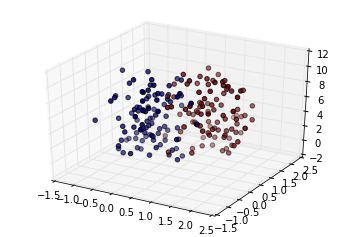

In [3]:
## ######################## ##
## Visualize the data ##
## ######################## ##
## def plot3d(df, **kwargs):
## fig = plt.figure()
## ax = fig.add_subplot(111, projection='3d')
## ax.scatter(df[:, 0], df[:, 1], df[:, 2], c = df[:,3])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(db["x1"], db["x2"], db["x3"], c = db["label"])
 
## collect combinations of same class
idx_g1 = db.index[db.label == 0]
idx_g2 = db.index[db.label == 1]
 
all_com_g1 = [i for i in combinations(idx_g1, 2)]
all_com_g2 = [i for i in combinations(idx_g2, 2)]
 
sample_g1 = [ all_com_g1[i] for i in choice(range(len(all_com_g1)), 500) ]
sample_g2 = [ all_com_g2[i] for i in choice(range(len(all_com_g2)), 500) ]
sample_pair = sample_g1 + sample_g2
print "# of pairs in sample_pair: %d" % len(sample_pair)

In [4]:
num_samples = [100, 500, 1000, 2000, 4000]
ratios = [1., .8, .6, .4, .2]
 
sim_pair_list_size = []
duration = []
fitted_trans_mtx = []
fitted_ratio = []
 
ldm = LDM()
 
for n_sample in num_samples:
    for ratio in ratios:
        # sample pair list prepration
        sample_g1 = [ all_com_g1[i] for i in choice(range(len(all_com_g1)), n_sample) ]
        sample_g2 = [ all_com_g2[i] for i in choice(range(len(all_com_g2)), n_sample * ratio) ]
        sample_pair = sample_g1 + sample_g2
 
        # model fitting
        start = time.time()
        ldm.fit(db.iloc[:, 1:].as_matrix(), sample_pair)
 
        # collect excution statistics and information
        duration.append(time.time() - start)
        sim_pair_list_size.append( len(sample_pair) )
        fitted_trans_mtx.append( ldm.get_transform_matrix() )
        fitted_ratio.append( ldm.get_ratio() )

        print " *************************************** \n"
        print " # of provided pair list of same class: %d \n" % len(sample_pair)
        print " learned transformation matrix: %s \n" % ldm.get_transform_matrix()
        print " Excuation time of fitting: %f s \n" % duration[-1]
        print " **************************************** \n"

--- 207.214851856 seconds ---
 *************************************** 

 # of provided pair list of same class: 200 

 learned transformation matrix: [0.28, 0.56, 0.16] 

 Excuation time of fitting: 210.375815 s 

 **************************************** 

--- 312.752964973 seconds ---
 *************************************** 

 # of provided pair list of same class: 180 

 learned transformation matrix: [0.59, 0.15, 0.25] 

 Excuation time of fitting: 315.340495 s 

 **************************************** 

--- 265.681859016 seconds ---
 *************************************** 

 # of provided pair list of same class: 160 

 learned transformation matrix: [0.16, 0.33, 0.51] 

 Excuation time of fitting: 268.352215 s 

 **************************************** 

--- 220.22329402 seconds ---
 *************************************** 

 # of provided pair list of same class: 140 

 learned transformation matrix: [0.36, 0.13, 0.51] 

 Excuation time of fitting: 222.441467 s 

 ********

In [19]:
#sim_pair_list_size = []
#duration = []
#fitted_trans_mtx = []
#fitted_ratio = []
exp_results = pd.DataFrame({
        "sim_pair_size": sim_pair_list_size,
        "class_ratio": ratios * len(num_samples),
        "comp_time": duration,
        "fitted_trans_mtx_x1": [i[0] for i in fitted_trans_mtx],
        "fitted_trans_mtx_x2": [i[1] for i in fitted_trans_mtx],
        "fitted_trans_mtx_x3": [i[1] for i in fitted_trans_mtx],
        })

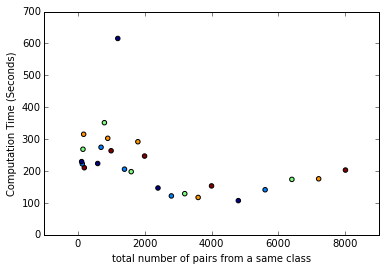

In [25]:
plt.scatter(exp_results["sim_pair_size"], \
            exp_results["comp_time"], \
            c=exp_results["class_ratio"])
plt.xlabel("total number of pairs from a same class")
plt.ylabel("Computation Time (Seconds)")

##### Results Analysis
The computation time is linearly dependent on the size of labeled data. As the pair list grows, the more computation cost is demanded. The L-shape curve is caused by the version of implementation strategy. The substantail fraction of overal computation is spent on generating pair list of data of the different classes.

In [33]:
def timecost_sum(x):
    return max(x), min(x), np.median(x)

for i in exp_results.class_ratio.unique():
    print "******* Computation Time (Second) vs. Class Ratio (#class0/#class1: {0}) *********\n".format(i)
    print timecost_sum( exp_results.loc[exp_results.class_ratio == i, "comp_time"] )
    print "**********************************\n"

******* Computation Time (Second) vs. Class Ratio (#class0/#class1: 1.0) *********

(263.61414408683777, 153.3125741481781, 210.37581515312195)
**********************************

******* Computation Time (Second) vs. Class Ratio (#class0/#class1: 0.8) *********

(315.34049510955811, 117.11986684799194, 291.91415691375732)
**********************************

******* Computation Time (Second) vs. Class Ratio (#class0/#class1: 0.6) *********

(351.62617588043213, 129.0097668170929, 198.01943111419678)
**********************************

******* Computation Time (Second) vs. Class Ratio (#class0/#class1: 0.4) *********

(274.51726293563843, 121.88982701301575, 205.83109188079834)
**********************************

******* Computation Time (Second) vs. Class Ratio (#class0/#class1: 0.2) *********

(615.73918199539185, 107.16749000549316, 223.60488390922546)
**********************************



In [37]:
#exp_results.sort("simp_pair_size", inplace=True)
#
#plt.plot(exp_results["sim_pair_size"], \
#         exp_results["fitted_trans_mtx_x1"])

### Investigation of Distance Distribution of User-Pairs Under Connections

# of all_com_g1: 4950
# of all_com_g2: 4950
# of all_com: 9900


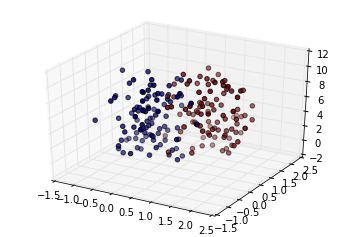

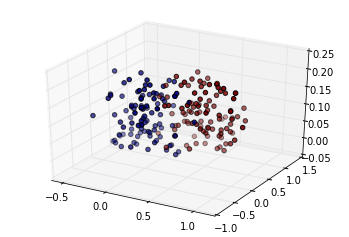

In [52]:
all_com = [i for i in set(all_com_g1 + all_com_g2)]
print "# of all_com_g1: %d" % len(all_com_g1)
print "# of all_com_g2: %d" % len(all_com_g2)
print "# of all_com: %d" % len(all_com)

# *------- Transformation Matrix of Choice ------*
choice_trans_matrix = [0.47, 0.51, 0.02]

# Transform user profile data
tfm_db = db[["x1", "x2", "x3"]] * choice_trans_matrix

# *-------- Visualized Data Points within Original Space ------*
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(db["x1"], db["x2"], db["x3"], c = db["label"])
#ax.title("Original Space")

# *-------- Visualized Data Points within Transformed Space ------*
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tfm_db["x1"], tfm_db["x2"], tfm_db["x3"], c = db["label"])
#ax.title("Transformed Space")

In [75]:
from scipy.spatial.distance import euclidean

def pair_wise_dist(pairs, profile_db = None):
    """Calculate the 
    """
    a, b = pairs
    a_vec, b_vec = profile_db[a, :], profile_db[b, :]
    return euclidean(a_vec, b_vec)

all_com_org_dists = []
all_com_tfm_dists = []

db_mtx = db[["x1", "x2", "x3"]].as_matrix()
tfm_db_mtx = tfm_db.as_matrix()

for p in all_com:
    temp_dist_01 = pair_wise_dist(p, db_mtx)
    temp_dist_02 = pair_wise_dist(p, tfm_db_mtx)
    all_com_org_dists.append( temp_dist_01 )
    all_com_tfm_dists.append( temp_dist_02 )
    
dist_df = pd.DataFrame({
        "user_a": [i[0] for i in all_com],
        "user_b": [i[1] for i in all_com],
        "org_dist": all_com_org_dists,
        "tfm_dist": all_com_tfm_dists
    })

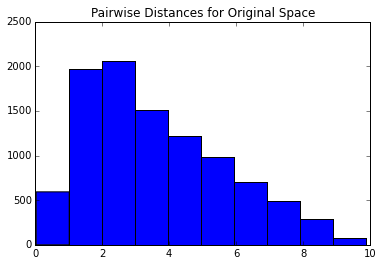

In [70]:
plt.hist(all_com_org_dists)
plt.title("Pairwise Distances for Original Space")

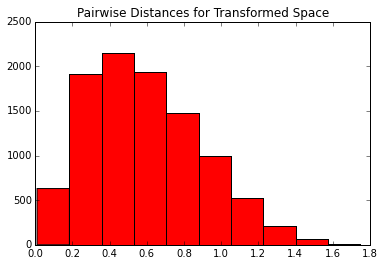

In [74]:
plt.hist(all_com_tfm_dists, color="red")
plt.title("Pairwise Distances for Transformed Space")

#### Investigate distance distribution of each users

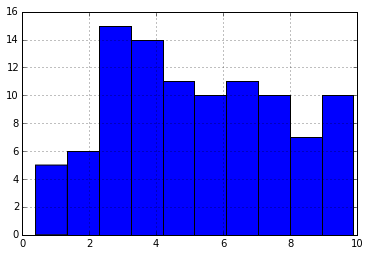

In [79]:
dist_df.head(5)

dist_df.loc[(dist_df.user_a == 0) | (dist_df.user_b == 0), "org_dist"].hist()

### Part I: Aggregate View of Distance Distribution Pertinent to Users under Connections 

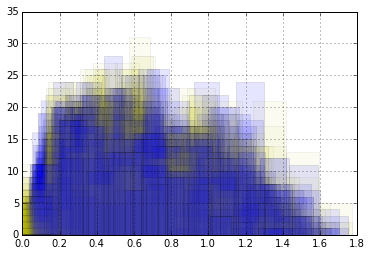

In [132]:
def get_unc_id(user_id, dist_db, all_user_list):
    """
    """
    connected_uids = set( list(dist_db.loc[dist_df.user_a == user_id, "user_b"]) \
                         + list(dist_db.loc[dist_df.user_b == user_id, "user_a"]) 
                        )
    connected_uids = [i for i in connected_uids]
    unconnected_uids = [(user_id, i) for i in all_user_list \
                      if i not in connected_uids]
    return unconnected_uids

def get_all_dist(pair_list, profile_db):
    """
    """
    dist = [ pair_wise_dist(i, profile_db) for i in pair_list ]
    return dist

def get_all_unc_dist(user_id, dist_db, \
                     profile_db, all_user_list):
    """
    """
    unc_pair_list = get_unc_id(user_id, dist_db, all_user_list)
    res = get_all_dist(unc_pair_list, profile_db)
    return res

## #################### ##
##
all_users = set(list(dist_df.user_a) + list(dist_df.user_b))
all_users = [i for i in all_users]

for uid in all_users:
    ## Unconnected
    pd.Series(get_all_unc_dist(uid, dist_df, tfm_db_mtx, all_users))\
    .hist(color = 'y', alpha = .05, bins = 10)
    ## Connected
    dist_df.loc[(dist_df.user_a == uid) | (dist_df.user_b == uid), "tfm_dist"]\
    .hist(color = 'b', alpha = .10, bins = 10)

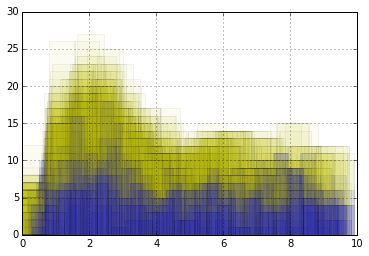

In [135]:
for uid in all_users:
    ## Unconnected
    pd.Series(get_all_unc_dist(uid, dist_df, db_mtx, all_users))\
    .hist(color = 'y', alpha = .05, bins = 10)
    ## Connected
    dist_df.loc[(dist_df.user_a == uid) | (dist_df.user_b == uid), "org_dist"]\
    .hist(color = 'b', alpha = .10, bins = 20)

#### Retrieve the distances between users not connected

In [120]:
get_all_unc_dist(uid, dist_df, tfm_db_mtx, all_users)